<a href="https://colab.research.google.com/github/vibhahugar/MLlab/blob/main/mllab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING LAB 1BM21CS255

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [11]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.style.use('ggplot')

In [13]:
import plotly.graph_objects as go # for plots
import plotly.express as px #for plots
import matplotlib.pyplot as plt # for visualizations and plots
import missingno as msno
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import os

Created dataset with 3 attributes: BMI, Age, Sugar & 10 values

In [4]:
df=pd.read_csv('/content/drive/MyDrive/dev_data/diabetesexam.csv')

In [10]:
df.head().T

,0,1,2,3,4
BMI,33.6,26.6,23.4,43.1,35.3
Age,50,30,40,67,23
Sugar,1,O,O,O,1


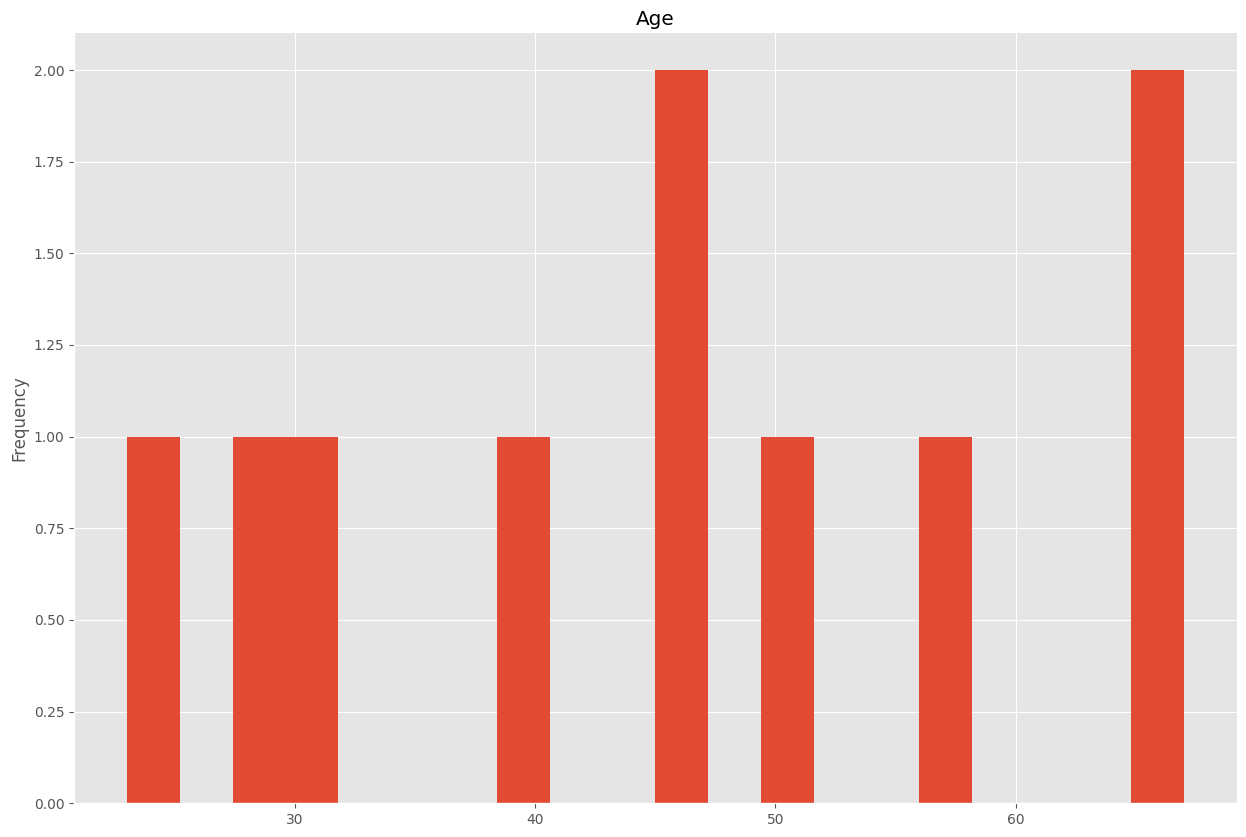

In [30]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

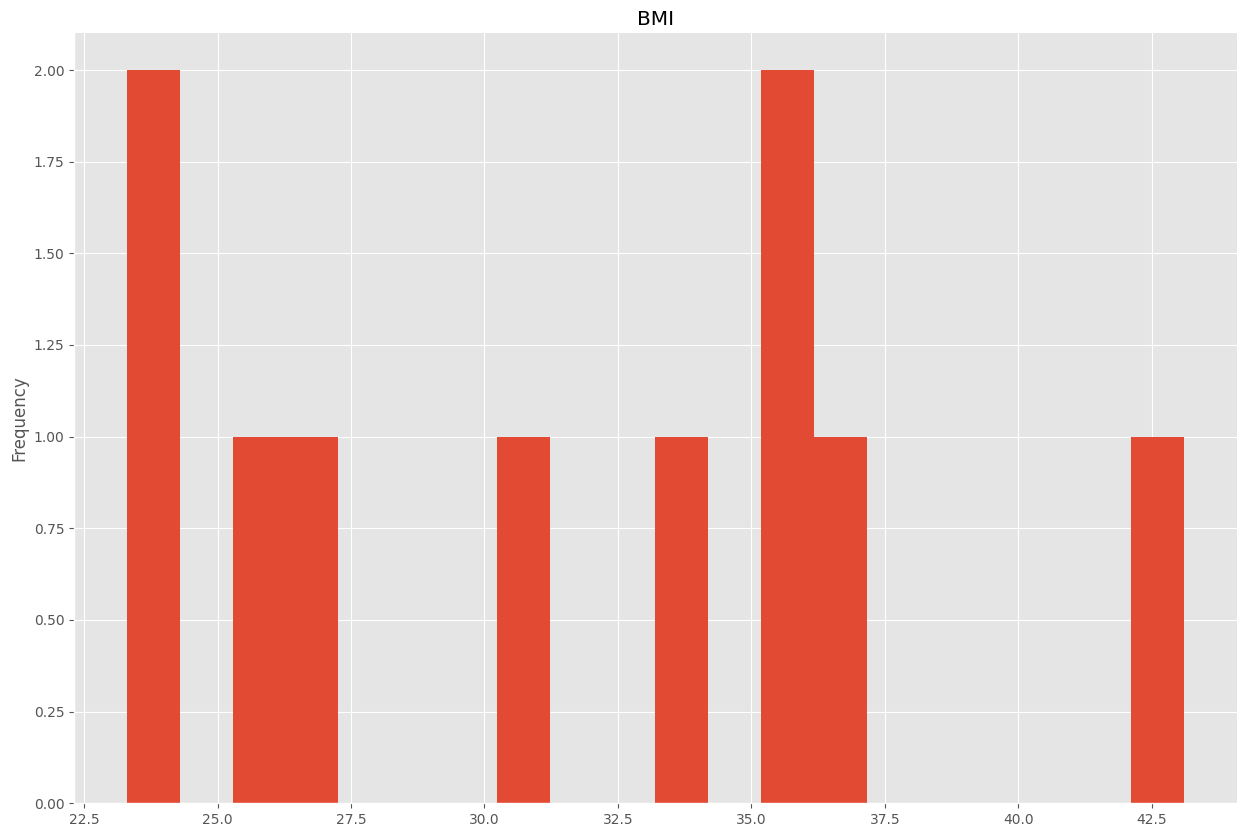

In [29]:
# @title BMI

from matplotlib import pyplot as plt
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     10 non-null     float64
 1   Age     10 non-null     int64  
 2   Sugar   10 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,10.0,31.46,6.587395,23.3,25.925,32.3,35.75,43.1
Age,10.0,45.30,15.290157,23.0,32.500,45.5,54.50,67.0


K NEAREST NEIGHBOURS

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('/content/drive/MyDrive/dev_data/diabetesexam.csv')

df['Sugar'] = df['Sugar'].apply(lambda x: 1 if x == '1' else 0)

X = df[['BMI', 'Age']]
y = df['Sugar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = knn.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


DECISION TREE

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df=pd.read_csv('/content/drive/MyDrive/dev_data/diabetesexam.csv')

df['Sugar'] = df['Sugar'].apply(lambda x: 1 if x == '1' else 0)

X = df[['BMI', 'Age']]
y = df['Sugar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


df['Sugar'] = df['Sugar'].apply(lambda x: 1 if x == '1' else 0)

X = df[['BMI', 'Age']]
y = df['Sugar']



# KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred_knn = knn.predict(X_scaled)

accuracy_knn = accuracy_score(y, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Decision Tree
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X, y)

y_pred_tree = clf.predict(X)

accuracy_tree = accuracy_score(y, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

KNN Accuracy: 1.0
Decision Tree Accuracy: 1.0


accuracy and plot a graph between these metrics for both models

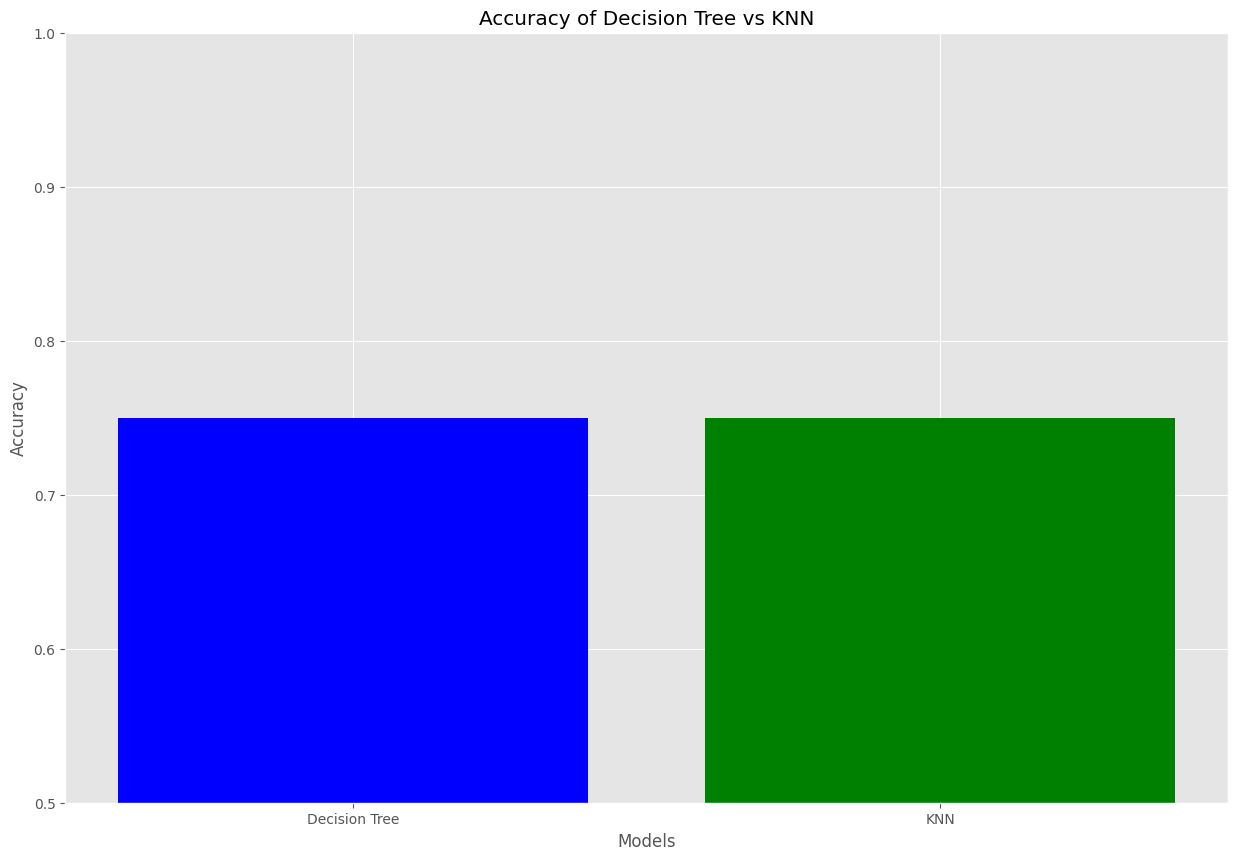

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dev_data/diabetesexam.csv')


df['Sugar'] = df['Sugar'].apply(lambda x: 1 if x == '1' else 0)


X = df[['BMI', 'Age']]
y = df['Sugar']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
accuracy_clf = accuracy_score(y_test, y_pred_clf)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = knn.score(X_test_scaled, y_test)


models = ['Decision Tree', 'KNN']
accuracies = [accuracy_clf, accuracy_knn]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree vs KNN')
plt.ylim(0.5, 1)
plt.show()
